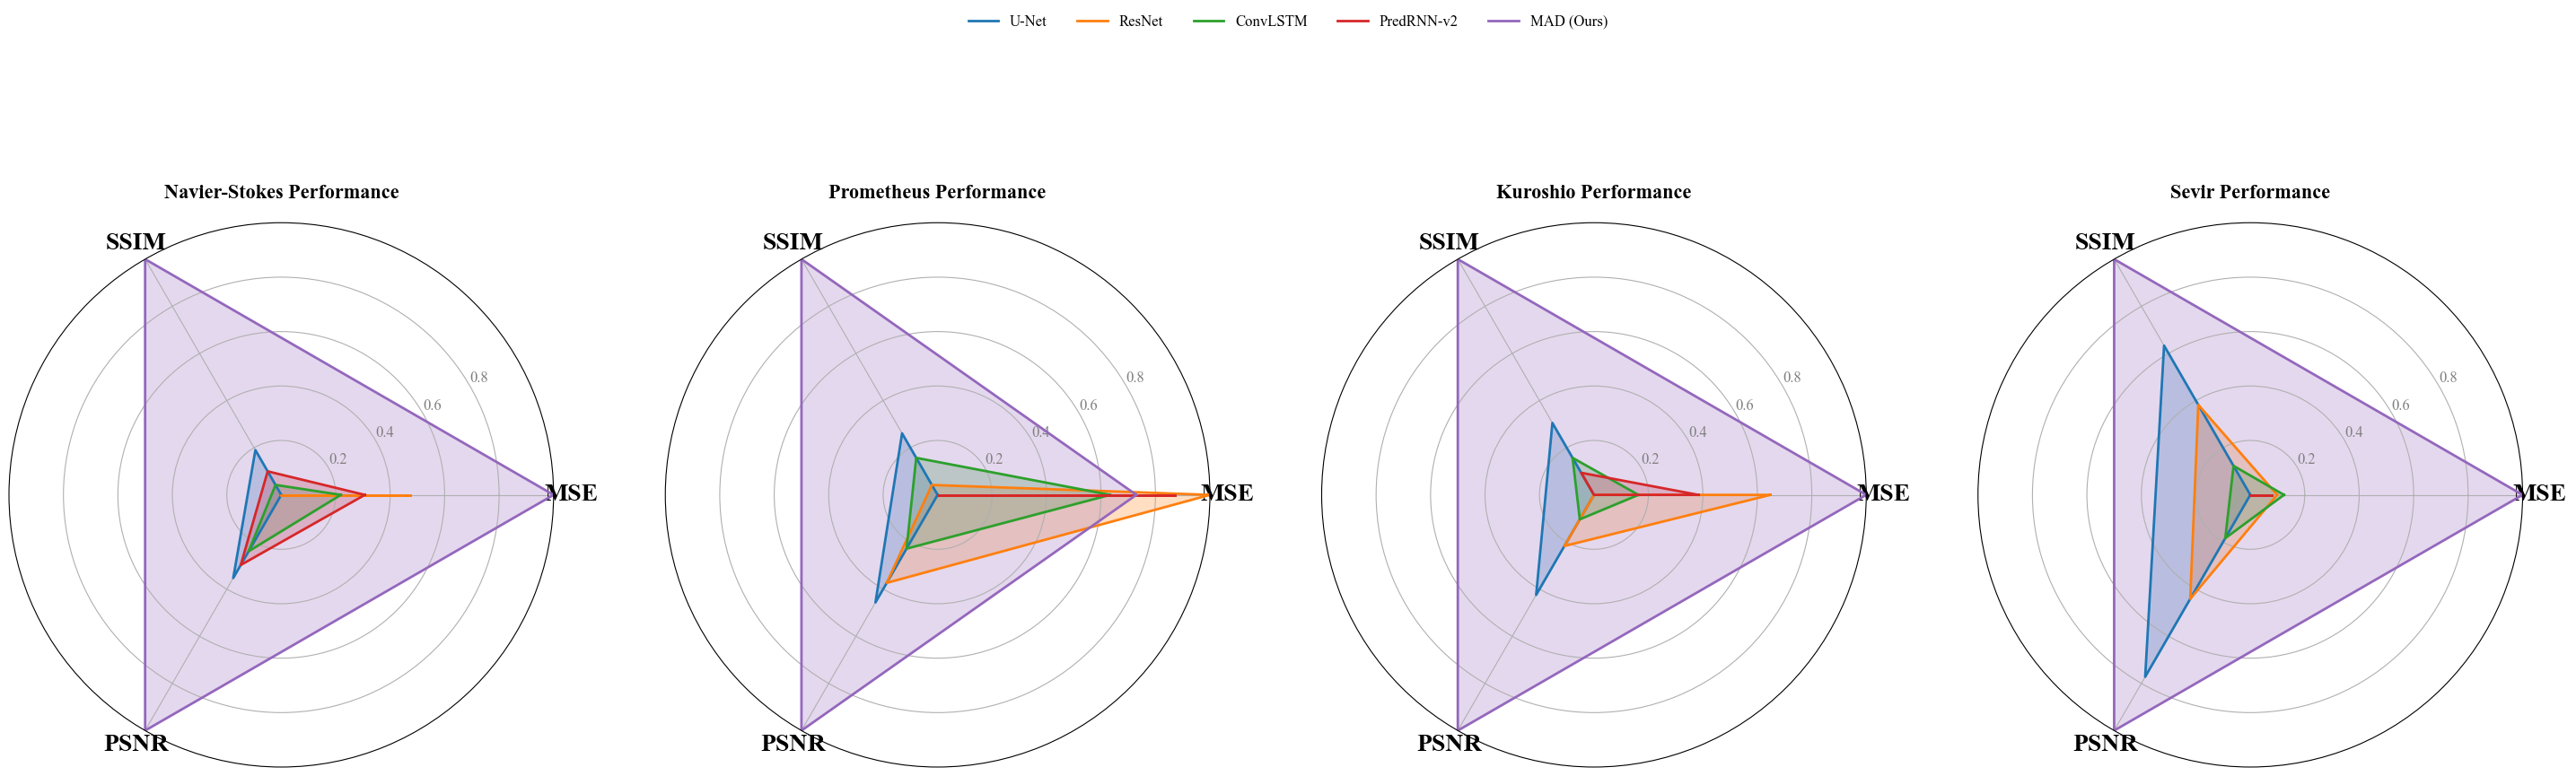

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi
import matplotlib as mpl

data = {
    'Model': ['U-Net', 'ResNet', 'ConvLSTM', 'PredRNN-v2', 'E3D-LSTM', 
              'PhyDnet', 'SimVP', 'Rainformer', 'Earthformer', 'TAU', 'MAD (Ours)'],
    'Navier-Stokes_MSE': [0.1352, 0.1254, 0.1305, 0.1287, 0.1323, 
                           0.1359, 0.1382, 0.1423, 0.1484, 0.1545, 0.1161],
    'Navier-Stokes_SSIM': [0.9231, 0.9132, 0.9154, 0.9184, 0.9123, 
                            0.9151, 0.9109, 0.9052, 0.8950, 0.8901, 0.9653],
    'Navier-Stokes_PSNR': [40.25, 39.10, 39.88, 40.07, 38.96, 
                            39.75, 40.58, 39.66, 38.75, 37.85, 42.36],
    'Prometheus_MSE': [0.1654, 0.1503, 0.1555, 0.1521, 0.1582, 
                       0.1603, 0.1624, 0.1685, 0.1726, 0.1787, 0.1541],
    'Prometheus_SSIM': [0.9301, 0.9202, 0.9254, 0.9183, 0.9102, 
                        0.9051, 0.8950, 0.8901, 0.8802, 0.8751, 0.9635],
    'Prometheus_PSNR': [41.50, 41.30, 40.95, 40.40, 39.80, 
                        40.60, 40.30, 39.50, 38.70, 37.85, 42.81],
    'Kuroshio_MSE': [0.0823, 0.0756, 0.0805, 0.0782, 0.0825, 
                     0.0858, 0.0899, 0.0931, 0.0962, 0.0993, 0.0724],
    'Kuroshio_SSIM': [0.9452, 0.9351, 0.9403, 0.9382, 0.9351, 
                      0.9302, 0.9251, 0.9203, 0.9152, 0.9101, 0.9682],
    'Kuroshio_PSNR': [43.50, 42.40, 41.80, 41.25, 40.55, 
                      39.45, 38.35, 37.25, 36.15, 35.05, 46.55],
    'Sevir_MSE': [39.321, 38.789, 38.657, 38.903, 38.529, 
                  38.755, 38.981, 39.307, 39.633, 39.959, 34.521],
    'Sevir_SSIM': [0.7401, 0.7303, 0.7202, 0.7154, 0.7053, 
                   0.6952, 0.6851, 0.6753, 0.6652, 0.6551, 0.7544],
    'Sevir_PSNR': [32.85, 31.95, 31.25, 30.75, 30.15, 
                   29.65, 28.95, 28.35, 27.65, 27.05, 33.47]
}

df = pd.DataFrame(data)

def plot_radar(ax, df, dataset, models, metrics, normalize=True):
    sub_df = df[df['Model'].isin(models)]
    
    values = []
    for metric in metrics:
        if metric == 'MSE':
            vals = 1 / sub_df[f'{dataset}_{metric}']
        else:
            vals = sub_df[f'{dataset}_{metric}']
        values.append(vals.values)
    
    values = np.array(values)
    
    if normalize:
        min_vals = values.min(axis=1).reshape(-1, 1)
        max_vals = values.max(axis=1).reshape(-1, 1)
        values = (values - min_vals) / (max_vals - min_vals)
    
    N = len(metrics)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]  # 
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics, fontsize=20, fontweight='bold')
    
    ax.set_rlabel_position(30)
    ax.set_yticks([0.2, 0.4, 0.6, 0.8])
    ax.set_yticklabels(["0.2","0.4","0.6","0.8"], color="grey", size=12)
    ax.set_ylim(0,1)
    
    for idx, model in enumerate(models):
        model_values = values[:, idx].tolist()
        model_values += model_values[:1]
        ax.plot(angles, model_values, linewidth=2, linestyle='solid', label=model)
        ax.fill(angles, model_values, alpha=0.25)
    
    ax.set_title(f'{dataset} Performance', size=16, fontweight='bold', pad=20)

selected_models = ['U-Net', 'ResNet', 'ConvLSTM', 'PredRNN-v2', 'MAD (Ours)']

datasets = ['Navier-Stokes', 'Prometheus', 'Kuroshio', 'Sevir']

metrics = ['MSE', 'SSIM', 'PSNR']

mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['font.size'] = 50  

fig, axes = plt.subplots(1, 4, figsize=(30, 10), subplot_kw=dict(polar=True))

for ax, dataset in zip(axes, datasets):
    plot_radar(ax, df, dataset, selected_models, metrics, normalize=True)

plt.tight_layout()

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05),
           ncol=len(selected_models), fontsize=12, frameon=False)

# fig.suptitle('Model Performance Comparison Across Datasets', fontsize=20, fontweight='bold', y=1.02)

plt.show()
